<a href="https://colab.research.google.com/github/HemanthNallamothu/TSF_DataScience_Internship_tasks/blob/main/TSF_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **A Simple Linear Regression**
## **Details :**
* Task1
* Data Science and Business Analytics internship
* The Sparks Foundation

**Author** --> *Hemanth Nallamothu*

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
# import data from url
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
# checking for null values
# data format
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


(25, 2)

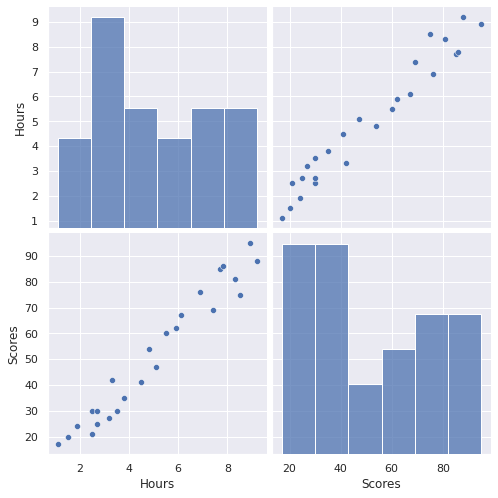

In [4]:
# Check if it is Linear Regression from data plot
sns.pairplot(data, height=3.5, aspect=1)
plt.show()

In [5]:
# extracting independent and dependent variables
X = data.iloc[:, :-1].values
y = data.iloc[:, 1].values
print(X, y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]] [21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


In [6]:
# splitting dataset into Train and Test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=36)
print(X_train)
print(y_train)

[[1.1]
 [7.4]
 [4.8]
 [2.7]
 [3.3]
 [1.9]
 [5.9]
 [2.5]
 [3.5]
 [9.2]
 [7.8]
 [2.7]
 [4.5]
 [5.1]
 [8.3]
 [3.2]
 [1.5]]
[17 69 54 30 42 24 62 21 30 88 86 25 41 47 81 27 20]


## **Train the Model**

In [7]:
from sklearn.linear_model import LinearRegression
Regressor = LinearRegression()
Regressor.fit(X_train, y_train)
print("Training Complete")

Training Complete


In [8]:
# Plotting the Regression line
line = Regressor.coef_*X + Regressor.intercept_
print(line)

[[26.58881811]
 [51.24457007]
 [33.22690518]
 [83.48670725]
 [36.07179963]
 [17.10583659]
 [90.12479432]
 [55.03776268]
 [81.59011095]
 [28.48541441]
 [75.90032203]
 [58.83095529]
 [45.55478116]
 [34.17520333]
 [13.31264398]
 [87.27989986]
 [26.58881811]
 [20.89902919]
 [60.7275516 ]
 [73.05542758]
 [28.48541441]
 [48.39967561]
 [38.91669409]
 [68.31393682]
 [76.84862019]]


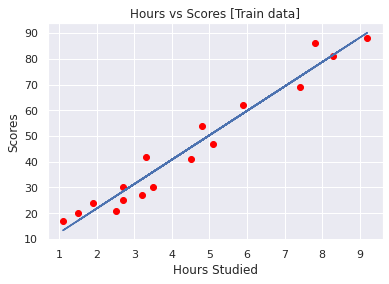

In [9]:
# Regression line for Train data on a plot 
plt.scatter(X_train, y_train, color="red")
plt.title("Hours vs Scores [Train data]")
plt.xlabel("Hours Studied")
plt.ylabel("Scores")
plt.plot(X, line)
plt.show()

# **Prediction**

In [10]:
y_pred = Regressor.predict(X_test)
print(y_pred)

[87.27989986 68.31393682 75.90032203 60.7275516  83.48670725 38.91669409
 55.03776268 26.58881811]


In [11]:
df = pd.DataFrame({'Actual':y_test, 'Predicted Score':y_pred})
df

,Actual,Predicted Score
0,95,87.279900
1,76,68.313937
2,85,75.900322
3,67,60.727552
4,75,83.486707
5,35,38.916694
6,60,55.037763
7,30,26.588818


In [12]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(Regressor, X, y, cv=2)
np.mean(scores)

0.9114274139104588

# **Evaluation Metrics**

In [13]:
from sklearn import metrics
metrics.r2_score(y_test, y_pred)

0.9008001319707398

In [14]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error:  6.444388780499278


In [15]:
# Predicting from input
score = Regressor.predict([[9.25]])
print("Predicted score if a student studies for 9.25 hrs per a day is {}".format(score))

Predicted score if a student studies for 9.25 hrs per a day is [90.5989434]


# **Analysis**
* From the Linear Regression model, we found a relation between the number of hours studied and the espected score of a student.
* From metrics, we found that the error in model is substaintial and needs more data for an accurate prediction.